# Project 1: Digit Classification with KNN and Naive Bayes

####This code was tested in Python3.5

In this project, you'll implement your own image recognition system for classifying digits. Read through the code and the instructions carefully and add your own code where indicated. Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but <b> please prepare your own write-up (with your own code). </b>

If you're interested, check out these links related to digit recognition:

Yann Lecun's MNIST benchmarks: http://yann.lecun.com/exdb/mnist/

Stanford Streetview research and data: http://ufldl.stanford.edu/housenumbers/

In [1]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_mldata
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report

# Set the randomizer seed so results are the same each time.
np.random.seed(0)

/Users/tedpham/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/tedpham/anaconda/lib/python3.6/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


Load the data. Notice that we are splitting the data into training, development, and test. We also have a small subset of the training data called mini_train_data and mini_train_labels that you should use in all the experiments below, unless otherwise noted.

In [2]:
# Load the digit data either from mldata.org, or once downloaded to data_home, from disk. The data is about 53MB so this cell
# should take a while the first time your run it.
mnist = fetch_mldata('MNIST original', data_home='~/datasets/mnist')
X, Y = mnist.data, mnist.target

# Rescale grayscale values to [0,1].
X = X / 255.0

# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this
# permutation to X and Y.
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

print('data shape: ', X.shape)
print('label shape:', Y.shape)

# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[61000:], Y[61000:]
dev_data, dev_labels = X[60000:61000], Y[60000:61000]
train_data, train_labels = X[:60000], Y[:60000]
mini_train_data, mini_train_labels = X[:1000], Y[:1000]

data shape:  (70000, 784)
label shape: (70000,)


### Problem 1

(1) Create a 10x10 grid to visualize 10 examples of each digit. Python hints:

- plt.rc() for setting the colormap, for example to black and white
- plt.subplot() for creating subplots
- plt.imshow() for rendering a matrix
- np.array.reshape() for reshaping a 1D feature vector into a 2D matrix (for rendering)

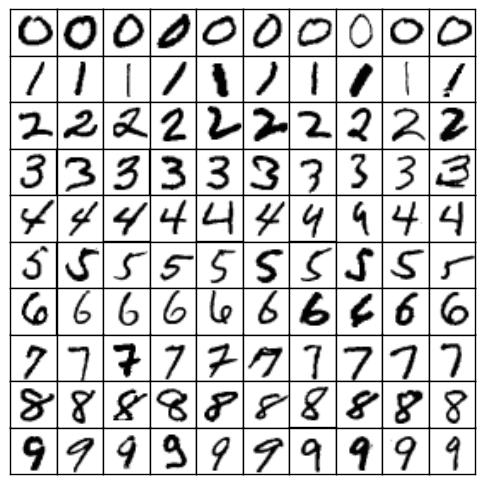

In [3]:
def P1(num_examples=10):

### STUDENT START ###
    # Initialize data to plot #
    plot_data = np.empty((0,784))
    
    # Get num_examples of each digit #
    for i in range(0,10):
        get_data = mini_train_data[mini_train_labels == i][:num_examples]
        plot_data= np.append(plot_data,get_data,axis=0)

    
    # Plot with object method for matplotlib #
    fig, ax = plt.subplots(10,num_examples,figsize=(6,6))
    plt.style.use('seaborn-white')
    
    for i, axi in enumerate(ax.flat):
        axi.imshow(plot_data[i].reshape(28,28),cmap ='binary') # show each digit
        axi.set(xticks=[],yticks =[]) # hide axes ticks
        axi.set_aspect('equal') # set aspect

    fig.subplots_adjust(wspace=0,hspace=0) # 

### STUDENT END ###

P1(10)

### Problem 2

(2) Evaluate a K-Nearest-Neighbors model with k = [1,3,5,7,9] using the mini training set. Report accuracy on the dev set. For k=1, show precision, recall, and F1 for each label. Which is the most difficult digit?

- KNeighborsClassifier() for fitting and predicting
- classification_report() for producing precision, recall, F1 results

In [5]:
def P2(k_values):

### STUDENT START ###
    
    for i in k_values:
        kNN = KNeighborsClassifier(n_neighbors = i)
        kNN.fit(mini_train_data,mini_train_labels)
        pred_labels = kNN.predict(dev_data)
        
        print('Accuracy on the dev set for k =',i,\
              ' is ',np.mean(pred_labels == dev_labels))

        if i == 1:
            print(classification_report(dev_labels,pred_labels))

    
### STUDENT END ###

k_values = [1, 3, 5, 7, 9]
P2(k_values)

Accuracy on the dev set for k = 1  is  0.888
             precision    recall  f1-score   support

        0.0       0.91      0.98      0.94        99
        1.0       0.89      1.00      0.94       105
        2.0       0.99      0.79      0.88       102
        3.0       0.77      0.87      0.82        86
        4.0       0.89      0.82      0.85       104
        5.0       0.93      0.84      0.88        91
        6.0       0.94      0.96      0.95        98
        7.0       0.89      0.92      0.90       113
        8.0       0.94      0.88      0.91        96
        9.0       0.78      0.82      0.80       106

avg / total       0.89      0.89      0.89      1000

Accuracy on the dev set for k = 3  is  0.878
Accuracy on the dev set for k = 5  is  0.869
Accuracy on the dev set for k = 7  is  0.865
Accuracy on the dev set for k = 9  is  0.863


**ANSWER:**
As expected the accuracy on the dev set declines with the number of neighbors. Smaller k values will have lower bias but higher variance. In this case, the difference between accuracies isn't much.

f1-score reflects both precision and recall so number '9' is the hardest to predict with the lowest f1-score.

### Problem 3

(3) Using k=1, report dev set accuracy for the training set sizes below. Also, measure the amount of time needed for prediction with each training size.

- time.time() gives a wall clock value you can use for timing operations

In [8]:
def P3(train_sizes, accuracies):

### STUDENT START ###
    for size in train_sizes:
        
        kNN = KNeighborsClassifier(n_neighbors=1)
        start_time = time.time()
        kNN.fit(train_data[:size],train_labels[:size])
        pred_labels = kNN.predict(dev_data)
        end_time = time.time()
        print('Train time for',size, 'training size is',\
              round(end_time - start_time,3), 's')
        accuracies.append(np.mean(pred_labels == dev_labels))
        print('Accuracy of prediction with', size,'training size is', accuracies[-1])

### STUDENT END ###

train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25000]
accuracies = []
P3(train_sizes, accuracies)

Train time for 100 training size is 0.131 s
Accuracy of prediction with 100 training size is 0.72
Train time for 200 training size is 0.243 s
Accuracy of prediction with 200 training size is 0.786
Train time for 400 training size is 0.48 s
Accuracy of prediction with 400 training size is 0.841
Train time for 800 training size is 0.967 s
Accuracy of prediction with 800 training size is 0.884
Train time for 1600 training size is 2.122 s
Accuracy of prediction with 1600 training size is 0.902
Train time for 3200 training size is 3.946 s
Accuracy of prediction with 3200 training size is 0.926
Train time for 6400 training size is 8.268 s
Accuracy of prediction with 6400 training size is 0.937
Train time for 12800 training size is 17.868 s
Accuracy of prediction with 12800 training size is 0.959
Train time for 25000 training size is 33.338 s
Accuracy of prediction with 25000 training size is 0.97


### Problem 4

(4) Fit a regression model that predicts accuracy from training size. What does it predict for n=60000? What's wrong with using regression here? Can you apply a transformation that makes the predictions more reasonable?

- Remember that the sklearn fit() functions take an input matrix X and output vector Y. So each input example in X is a vector, even if it contains only a single value.

Regression model predicts accuracy for n = 60000 to be 124.307 %


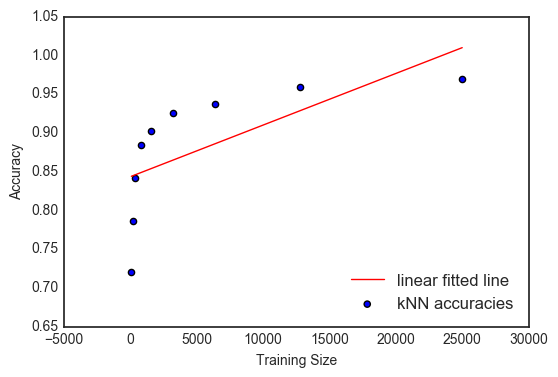

In [9]:
def P4():

### STUDENT START ###
    # Call global variables from previous step
    global train_sizes, accuracies
    
    # Make feature Matrix X and target vector y for fitting linear regression
    
    # Use numpy broadcasting to make the Matrix X
    X = np.array(train_sizes)[:,np.newaxis]
    y = accuracies
    model = LinearRegression()
    model.fit(X,y)
    
    # Get linear prediction of n = 60000
    print('Regression model predicts accuracy for n = 60000 to be',
          round(model.predict(60000)[0]*100,3),'%')
    
    # Plot the fitted line
    plt.scatter(train_sizes,y, label = 'kNN accuracies')
    plt.plot(train_sizes,model.predict(X),'-r', label = 'linear fitted line')
    plt.xlabel('Training Size')
    plt.ylabel('Accuracy')
    plt.legend(loc=4, frameon=False);

### STUDENT END ###

P4()

**ANSWER:**
At n = 60000, the accuracy is at 124.307%.
Linear regression is not a good choice for fitting the raw accuracy data because the accuracy increases abruptly with training size between 0-5000. Furthermore, as the training size increases, the accuracy will pass 100% which would not make sense.

We can do a log transformation on training size but at n = 60000 the accuracy is still slightly above 100%. Regardless of how we transform the data for linear regression, the accuracy will always surpass 100%.


Regression model predicts accuracy for n = 60000 to be 103.387 %


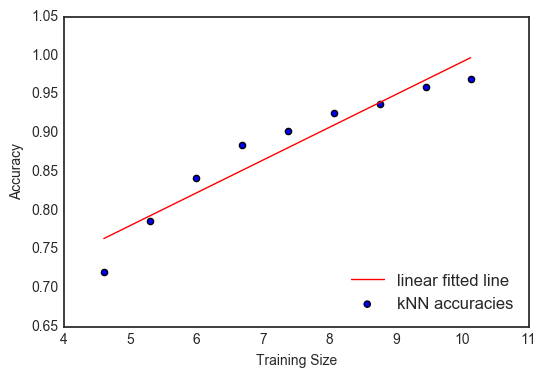

In [10]:
# Do a log transform on train_size to fit a better linear line

log_x = np.log(train_sizes)
X = log_x[:,np.newaxis]
y = accuracies
model = LinearRegression().fit(X,y)

# Get linear prediction of n = 60000
print('Regression model predicts accuracy for n = 60000 to be',
      round(model.predict(np.log(60000))[0]*100,3),'%')

# Plot the fitted line
plt.scatter(log_x,y, label = 'kNN accuracies')
plt.plot(log_x,model.predict(X),'-r', label = 'linear fitted line')
plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.legend(loc=4, frameon=False);



### Problem 5

Fit a 1-NN and output a confusion matrix for the dev data. Use the confusion matrix to identify the most confused pair of digits, and display a few example mistakes.

- confusion_matrix() produces a confusion matrix

[[ 97   0   0   0   0   0   2   0   0   0]
 [  0 105   0   0   0   0   0   0   0   0]
 [  4   4  81   4   0   0   0   4   3   2]
 [  1   0   0  75   0   3   0   3   1   3]
 [  0   2   0   0  85   0   3   0   0  14]
 [  2   0   0   9   0  76   0   1   1   2]
 [  1   1   1   0   1   0  94   0   0   0]
 [  1   4   0   1   1   0   0 104   0   2]
 [  0   2   0   5   0   2   1   0  84   2]
 [  1   0   0   3   9   1   0   5   0  87]]


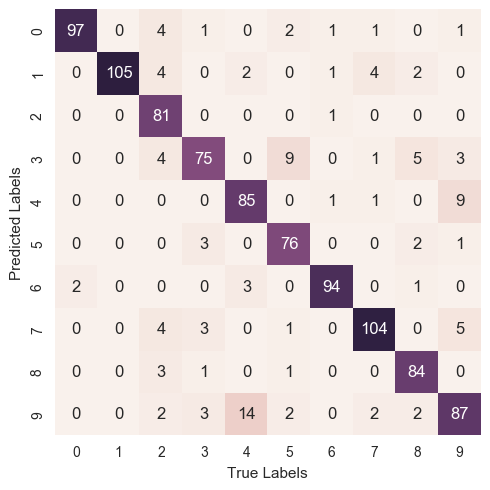

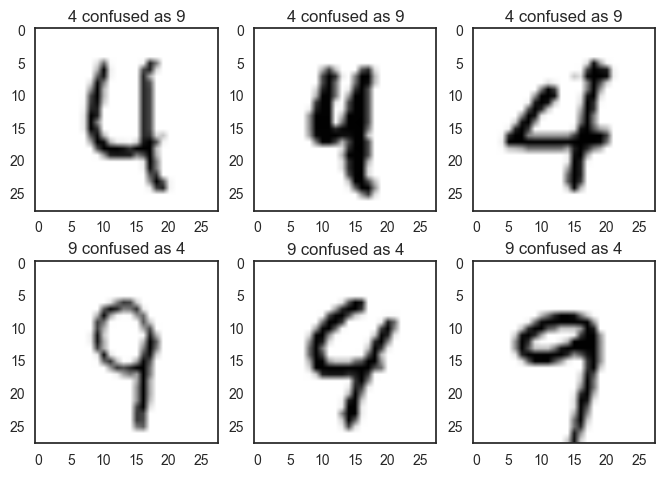

In [23]:
def P5():

### STUDENT START ###
    pred_labels = KNeighborsClassifier(n_neighbors=1)\
                    .fit(mini_train_data,mini_train_labels)\
                    .predict(dev_data)
    cm = confusion_matrix(dev_labels,pred_labels)
    
    print(cm) # print a simple confusion matrix
    
    # print a more elaborate confusion matrix with seaborn
    import seaborn as sns
    sns.heatmap(cm.T,square=True,annot=True, fmt='d',cbar=False)
    plt.xlabel('True Labels')
    plt.ylabel('Predicted Labels')
    
    """
    The most confused pair from the matrix is 4 and 9"""
    
    index49 = (dev_labels == 4) & (pred_labels == 9)
    index94 = (dev_labels == 9) & (pred_labels == 4)
    to_plot49 = dev_data[index49][:3]
    to_plot94 = dev_data[index94][:3]

    plt.style.use('seaborn-white')
    fig, ax = plt.subplots(2,3)
    
    for i in range(3):
        ax[0,i].imshow(to_plot49[i].reshape(28,28),cmap='binary')
        ax[0,i].set_title('4 confused as 9')
        ax[1,i].imshow(to_plot94[i].reshape(28,28),cmap='binary')
        ax[1,i].set_title('9 confused as 4')
### STUDENT END ###

P5()

### Problem 6

(6) A common image processing technique is to smooth an image by blurring. The idea is that the value of a particular pixel is estimated as the weighted combination of the original value and the values around it. Typically, the blurring is Gaussian -- that is, the weight of a pixel's influence is determined by a Gaussian function over the distance to the relevant pixel.

Implement a simplified Gaussian blur by just using the 8 neighboring pixels: the smoothed value of a pixel is a weighted combination of the original value and the 8 neighboring values. Try applying your blur filter in 3 ways:
- preprocess the training data but not the dev data
- preprocess the dev data but not the training data
- preprocess both training and dev data

Note that there are Guassian blur filters available, for example in scipy.ndimage.filters. You're welcome to experiment with those, but you are likely to get the best results with the simplified version I described above.

Accuracy score without blur 0.869
Accuracy score with train blur 0.901
Accuracy score with dev blur 0.85
Accuracy score with both train and dev blur 0.899


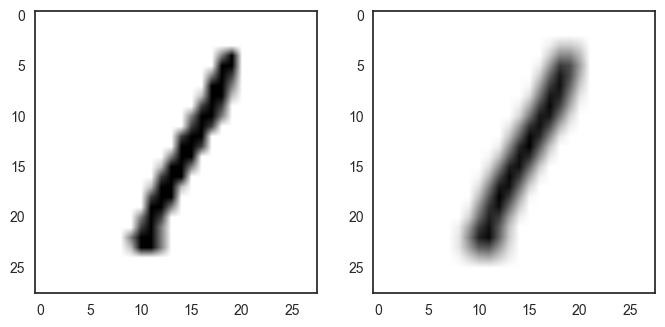

In [29]:
def P6():
    
    ### STUDENT START ###
    """each image is represented by a (1,784) array to blur such an image each pixel with index i
    will be averaged by 8 other pixels at indexes i-29,i-28,i-27, i-1, i+1, i+27,i+28,i+29
    for simplicity we will not blur the pixels at the edges whose indexes are within 0-27, 754-783 and 
    have modulo of 0 & 1 when divided by 28 """

    def custom_blur(image):
        blur_image = np.zeros((image.shape)) #initialize a new image
        for i in range(0,784):
            if (i%28 in [0,1]) or (i in range(0,28)) or (i in range(754,784)):
                blur_image[i] = image[i]
            else:
                blur_image[i] = np.mean([image[i-29],image[i-28],image[i-27],
                                        image[i-1],image[i],image[i+1],
                                        image[i+27],image[i+28],image[i+29]
                                        ])
        return blur_image

    # Get blur train and dev data
    blur_train_data = np.array(list(map(custom_blur,mini_train_data)))
    blur_dev_data = np.array(list(map(custom_blur,dev_data)))

    # Compare before and after applying custom_blur on a digit

    new_image = custom_blur(mini_train_data[0])
    plt.style.use('seaborn-white')
    fig, ax = plt.subplots(1,2)
    ax[0].imshow(mini_train_data[0].reshape(28,28),cmap='binary')
    ax[1].imshow(new_image.reshape(28,28),cmap='binary')
    
    # Fit kNN model and print out accuracies
    raw_pred=KNeighborsClassifier().fit(mini_train_data,mini_train_labels)\
                               .predict(dev_data)
    print('Accuracy score without blur',np.mean(raw_pred == dev_labels))

    blur_train_pred=KNeighborsClassifier().fit(blur_train_data,mini_train_labels)\
                                          .predict(dev_data)

    print('Accuracy score with train blur',np.mean(blur_train_pred == dev_labels))

    blur_dev_pred=KNeighborsClassifier().fit(mini_train_data,mini_train_labels)\
                                          .predict(blur_dev_data)

    print('Accuracy score with dev blur',np.mean(blur_dev_pred == dev_labels))

    blur_both_pred=KNeighborsClassifier().fit(blur_train_data,mini_train_labels)\
                                          .predict(blur_dev_data)

    print('Accuracy score with both train and dev blur',np.mean(blur_both_pred == dev_labels))

### STUDENT END ###

P6()

**ANSWER:**
Preprocessing the train data improves the accuracy over the raw score while preprocessing the dev data reduces the accuracy. When the blurring is applied on both train and dev data, the accuracy also improves but not to the level of blurring only the train data. Intuitively, blurring the training data hides details on the training digits, making the model generalize better.

(Note: The custom_blur function does not scale really well on the train_data set so mini_train_data is used
to ask Todd: blurring by averaging looks like applying a masking matrix on the original image, would love to get
some advice on how to code this more effectively)

### Problem 7: Naive Bayes

(7) Fit a Naive Bayes classifier and report accuracy on the dev data. Remember that Naive Bayes estimates P(feature|label). While sklearn can handle real-valued features, let's start by mapping the pixel values to either 0 or 1. You can do this as a preprocessing step, or with the binarize argument. With binary-valued features, you can use BernoulliNB. Next try mapping the pixel values to 0, 1, or 2, representing white, grey, or black. This mapping requires MultinomialNB. Does the multi-class version improve the results? Why or why not?

In [58]:
def P7():

### STUDENT START ###
    
    # train a BernoulliNB model with train_data
    bn = BernoulliNB(binarize=0.5)
    bn.fit(train_data,train_labels)
    bn_pred_labels = bn.predict(dev_data)
    print('Accucracy score with BernoulliNB is',np.mean(bn_pred_labels == dev_labels))
    
    # train a MultinomialNB model with train_data
    train_copy = train_data.copy()
    train_copy[train_copy < 0.25] = 0
    train_copy[np.where(np.logical_and(train_copy >= 0.25,train_copy <0.75))] = 1
    train_copy[train_copy >= 0.75] = 2

    mbn_pred_labels = MultinomialNB().fit(train_copy,train_labels)\
                                     .predict(dev_data)
    print('Accuracy score with MultinomialNB is',np.mean(mbn_pred_labels == dev_labels))


    
### STUDENT END ###

P7()

Accucracy score with BernoulliNB is 0.845
Accuracy score with MultinomialNB is 0.826


**ANSWER:**
The mapping MultinomialNB does not improve the accuracy score. Processing
the data into 0,1,2 might result in slightly more overfitting than the BernoulliNB.

### Problem 8

(8) Use GridSearchCV to perform a search over values of alpha (the Laplace smoothing parameter) in a Bernoulli NB model. What is the best value for alpha? What is the accuracy when alpha=0? Is this what you'd expect?

- Note that GridSearchCV partitions the training data so the results will be a bit different than if you used the dev data for evaluation.

In [45]:
def P8(alphas):

### STUDENT START ###
    
    grid = GridSearchCV(BernoulliNB(binarize =0.5),alphas)
    grid.fit(train_data,train_labels)
    print('Best Parameters',grid.best_params_)
    print(grid.grid_scores_)


### STUDENT END ###

alphas = {'alpha': [0.0, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}
nb = P8(alphas)

Best Parameters {'alpha': 0.0001}
[mean: 0.09892, std: 0.00002, params: {'alpha': 0.0}, mean: 0.83690, std: 0.00270, params: {'alpha': 0.0001}, mean: 0.83670, std: 0.00266, params: {'alpha': 0.001}, mean: 0.83652, std: 0.00268, params: {'alpha': 0.01}, mean: 0.83615, std: 0.00274, params: {'alpha': 0.1}, mean: 0.83543, std: 0.00269, params: {'alpha': 0.5}, mean: 0.83505, std: 0.00284, params: {'alpha': 1.0}, mean: 0.83452, std: 0.00293, params: {'alpha': 2.0}, mean: 0.83245, std: 0.00271, params: {'alpha': 10.0}]


In [14]:
#print nb.best_params_

**ANSWER:**
For alpha = 0, the accuracy score is 0.0989 = 9.89% which is worse than random guessing ten digits between 0:9. This is expected because with alpha = 0, it's unknown how the scikit model handles the zero probabilities of some class and feature, resulting in unpredictable behavior. 

The best value for alpha with the train_data is 0.0001 and 0.01 for mini_train_data which make sense given the data.

### Problem 9

(9) Try training a model using GuassianNB, which is intended for real-valued features, and evaluate on the dev data. You'll notice that it doesn't work so well. Try to diagnose the problem. You should be able to find a simple fix that returns the accuracy to around the same rate as BernoulliNB. Explain your solution.

Hint: examine the parameters estimated by the fit() method, theta\_ and sigma\_.

In [35]:
def P9():

### STUDENT END ###
    gnb = GaussianNB()
    gnb.fit(train_data,train_labels)
    print('Accuracy score with GuassianNB is',gnb.score(dev_data,dev_labels))
    
    # fix Guassian by specify non-zero sigma
    gnb.sigma_ = np.ones((10,784))*0.1

    gnb_pred = gnb.predict(dev_data)
    print('Accuracy score with fixed GuassianNB is',np.mean(gnb_pred == dev_labels))

### STUDENT END ###

P9()

Accuracy score with GuassianNB is 0.571
Accuracy score with fixed GuassianNB is 0.807


**ANSWER:**
The gaussian model assumes the data has a normality in the data. However, the digit's pixel values aren't in a normal distribution. So the model results in high bias with 'near' zero variance. So setting a non zero variance improve the prediction.


### Problem 10

(10) Because Naive Bayes is a generative model, we can use the trained model to generate digits. Train a BernoulliNB model and then generate a 10x20 grid with 20 examples of each digit. Because you're using a Bernoulli model, each pixel output will be either 0 or 1. How do the generated digits compare to the training digits?

- You can use np.random.rand() to generate random numbers from a uniform distribution
- The estimated probability of each pixel is stored in feature\_log\_prob\_. You'll need to use np.exp() to convert a log probability back to a probability.

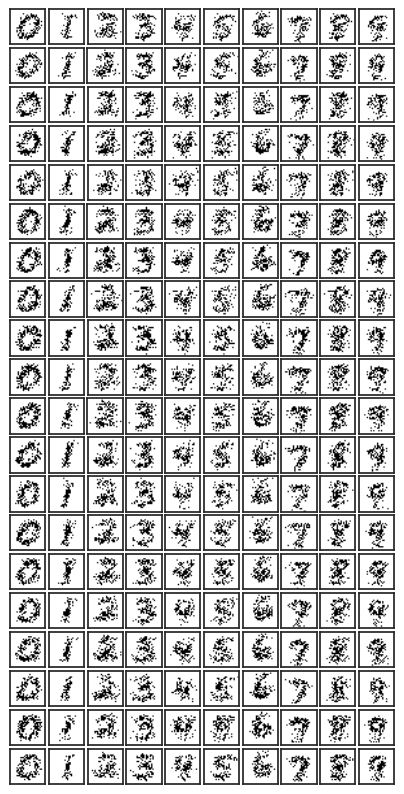

In [59]:
def P10(numEx):

### STUDENT START ###
     
    #Specify model
    bn = BernoulliNB(alpha = 0.0001,binarize=0.50)
    bn.fit(train_data,train_labels)
    
    #Generate numbers
    numEx = 20
    toPrint = np.empty((0,784))
    for ex in range(numEx):
        rand = np.random.rand(784)
        
        # Get Generated Digits
        toPrint = np.append(toPrint,
                            np.greater(np.exp(bn.feature_log_prob_),rand).astype(int),
                            axis = 0)

    fig, ax = plt.subplots(numEx,10,figsize=(5,10))
    for i, axi in enumerate(ax.flat):

        axi.imshow(toPrint[i].reshape(28,28),cmap ='binary')
        axi.set(xticks=[],yticks =[])
        axi.set_aspect('equal')

    fig.subplots_adjust(wspace=0,hspace=0.1)

### STUDENT END ###

P10(20)

**ANSWER:**
The generated digits are spotty in the background. This is because Naives Bayes assume
 pixels are independent from each other when they are probably not.

(11) Remember that a strongly calibrated classifier is rougly 90% accurate when the posterior probability of the predicted class is 0.9. A weakly calibrated classifier is more accurate when the posterior is 90% than when it is 80%. A poorly calibrated classifier has no positive correlation between posterior and accuracy.

Train a BernoulliNB model with a reasonable alpha value. For each posterior bucket (think of a bin in a histogram), you want to estimate the classifier's accuracy. So for each prediction, find the bucket the maximum posterior belongs to and update the "correct" and "total" counters.

How would you characterize the calibration for the Naive Bayes model?

In [60]:
def P11(buckets, correct, total):
    
### STUDENT START ###
    bn = BernoulliNB(alpha = 0.0001, binarize=0.5) # Specify the model
    bn.fit(train_data,train_labels)
    
    bn_pred = bn.predict(dev_data) # Get Prediction
    trueMatch = bn_pred == dev_labels # Get an array of where predict match true values
    
    pred_prob = bn.predict_proba(dev_data) # Get Prediction Probabilities
    maxProb = [prob.max() for prob in pred_prob] # Get maximum posterior for each prediction
    
    newBuckets = buckets[:]
    newBuckets.insert(0,0) #make new buckets to include zero term for np.digitize
    
    inBin = np.digitize(maxProb,newBuckets,right=True) - 1 #Adjust np.digitize output to match BINs

    """
       Iterate through the bins, count how many True for inBin == Bin which is the total 
       for that bin. If that index of Bin is also a correct match then counted towards correct
    """
    for Bin in range(len(buckets)):
        total[Bin] += (inBin == Bin).sum() # Update total for each Bin
        correct[Bin] += ((inBin == Bin) & trueMatch).sum() # Update correct for each bin
                
### STUDENT END ###

buckets = [0.5, 0.9, 0.999, 0.99999, 0.9999999, 0.999999999, 0.99999999999, 0.9999999999999, 1.0]
correct = [0 for i in buckets]
total = [0 for i in buckets]

P11(buckets, correct, total)

for i in range(len(buckets)):
    accuracy = 0.0
    if (total[i] > 0): accuracy = correct[i] / total[i]
    print('p(pred) <= %.13f    total = %3d    accuracy = %.3f' %(buckets[i], total[i], accuracy))

p(pred) <= 0.5000000000000    total =   3    accuracy = 0.333
p(pred) <= 0.9000000000000    total =  40    accuracy = 0.575
p(pred) <= 0.9990000000000    total =  97    accuracy = 0.495
p(pred) <= 0.9999900000000    total =  75    accuracy = 0.640
p(pred) <= 0.9999999000000    total =  63    accuracy = 0.714
p(pred) <= 0.9999999990000    total =  70    accuracy = 0.871
p(pred) <= 0.9999999999900    total =  75    accuracy = 0.893
p(pred) <= 0.9999999999999    total =  81    accuracy = 0.926
p(pred) <= 1.0000000000000    total = 496    accuracy = 0.972


**ANSWER:**
The Naive Bayes is weakly calibrated because at p(pred) <=90 the accuracy is only 0.561 and in general higher thresholds correspond to higher accuracy.

(12) EXTRA CREDIT

Try designing extra features to see if you can improve the performance of Naive Bayes on the dev set. Here are a few ideas to get you started:
- Try summing the pixel values in each row and each column.
- Try counting the number of enclosed regions; 8 usually has 2 enclosed regions, 9 usually has 1, and 7 usually has 0.

Make sure you comment your code well!

In [57]:
# First Try apply a Gaussian blur in scipy to the data

import scipy.ndimage as sp
train_copy = train_data.copy()
for i in range(train_copy.shape[0]):
    train_copy[i] = sp.filters.gaussian_filter(train_copy[i],0.4) #chose sigma =0.4
    
bn1 = BernoulliNB(alpha = 0.0001, binarize=0.5) # Specify the model
bn1.fit(train_data,train_labels)
base_score = bn1.score(dev_data,dev_labels)
print('base score',base_score)

bn2 = BernoulliNB(alpha = 0.0001, binarize=0.5) # Specify the model
bn2.fit(train_copy,train_labels)
print('Accuracy Improvement of Gaussian Filter',
      'over base score is',
      (bn2.score(dev_data,dev_labels) - base_score)*100,'%')

base score 0.85
Accuracy Improvement of Gaussian Filter over base score is 0.0 %


In [55]:
"""

2nd try: use scipy to count distinct regions of white spaces (~ enclosed regions)

The scipy.ndimage.label function returns the number of separated features in a binary image 
i.e. the number of the connected 1s groups

So we can use this function to identify the # of Zero groups by inverting the binary image

In the digit the background is white so this will be counted toward the connected groups
so we subtract 1 from the count.


"""

import scipy.ndimage as sp
import sklearn.preprocessing

def process_data(data):
    
    # copy data
    data_copy = data.copy()
    data_copy = sklearn.preprocessing.binarize(data_copy,0.5) #binarize images
    
    # initialize a new column feature
    new_feature = np.empty((data.shape[0],0))
    
    for img in data_copy:
        img = 1-img # invert the image 
        img = img.reshape(28,28) # reshape image
        label, num = sp.label(img) #measure the number of white groups including the background
        new_feature = np.append(new_feature,num-1) # substract the background count
    

    return_data = np.zeros((data.shape[0],785)) #initialize the return array
    return_data[:,:-1] = data_copy # first 784 columns from data_copy
    return_data[:,-1] = new_feature # add the 785th column which is the new feature
    
    return return_data


train_copy = process_data(train_data) # get train data
dev_copy = process_data(dev_data) # get dev data

bn1 = BernoulliNB(alpha = 0.0001, binarize=0.5) # Specify the model
bn1.fit(train_data,train_labels)
base_score = bn1.score(dev_data,dev_labels)
print('base score',base_score)

bn2 = BernoulliNB(alpha = 0.0001, binarize=0.5) # Specify the model
bn2.fit(train_copy,train_labels)
print('Accuracy Improvement of white regions count',
      'over base score is',
      (bn2.score(dev_copy,dev_labels) - base_score)*100,'%')

base score 0.85
Accuracy Improvement of white regions count over base score is 0.7 %


In [1]:
??sp.label

Object `sp.label` not found.


In [2]:
import scipy.ndimage as sp
??sp.label


In [4]:
??sp._ni_label._label

In [3]:
import pandas as pd
k = pd.Series([1,2,3,4,4,5,5])
k.unique()

array([1, 2, 3, 4, 5])